In [1]:
import os
import sys

os.chdir('/Users/wangqiqian/Desktop/TrafficTDApython/')
sys.path.append('/Users/wangqiqian/Desktop/TrafficTDApython/')
sys.path.append('/Users/wangqiqian/Desktop/TrafficTDApython/Version3')

from Version3.tdamapper.core import MapperAlgorithm, FailSafeClustering
from Version3.tdamapper.cover import CubicalCover
from Version3.tdamapper.clustering import FailSafeClustering
from Version3.tdamapper.plot import MapperLayoutInteractive, MapperPlot

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.datasets import make_circles, load_digits, make_blobs

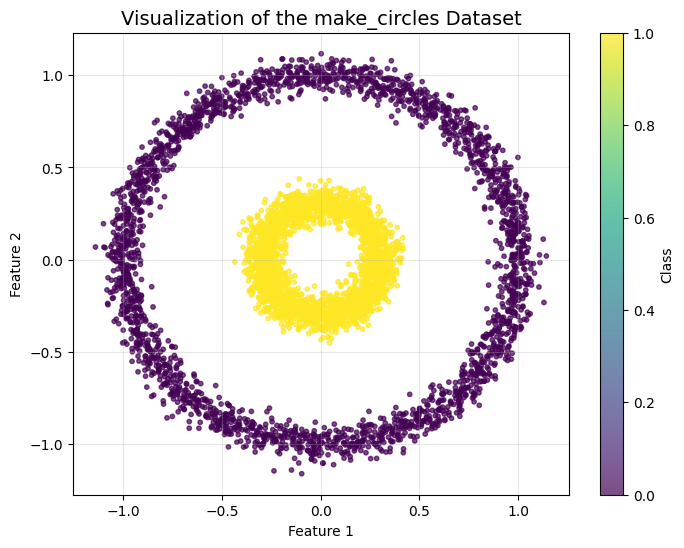

In [2]:
X, y = make_circles( 
    n_samples=5000,
    noise=0.05,
    factor=0.3,
    random_state=42
)
data = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])

pca = PCA(n_components=2)
lens = pca.fit_transform(X)
# data["Label"] = y

# Visualize the dataset
plt.figure(figsize=(8, 6))
plt.scatter(data["Feature 1"], data["Feature 2"], c=y, cmap="viridis", s=10, alpha=0.7)
plt.title("Visualization of the make_circles Dataset", fontsize=14)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Class")
plt.grid(alpha=0.3)
plt.show()

In [22]:
detailed_results = []

for overlap in np.arange(3, 6, 0.5):
    silhouette_for_intervals = []

    for interval in range(5, 11):
        mapper_algo = MapperAlgorithm(
            cover=CubicalCover(
                n_intervals=interval,
                overlap_frac=overlap / 10
            ),
            clustering=AgglomerativeClustering(n_clusters=2, linkage='single')
        )

        mapper_info = mapper_algo.fit_transform(X, lens)
        silhouette_for_intervals.append(mapper_info[1])

        detailed_results.append({
            "overlap": overlap,
            "interval": interval,
            "silhouette": mapper_info[1],
            "mapper_info": mapper_info
        })
        print(f'interval:{interval}, overlap:{overlap}')
 
    best_interval = np.argmax(silhouette_for_intervals) + 5  # +5 因為 interval 從5開始

detailed_results_df = pd.DataFrame(detailed_results)
detailed_results_df.sort_values(by='silhouette')

Processing Clusters: 100%|██████████| 18/18 [00:00<00:00, 905.03it/s]


interval:5, overlap:3.0


Processing Clusters: 100%|██████████| 24/24 [00:00<00:00, 508.46it/s]


interval:6, overlap:3.0


Processing Clusters: 100%|██████████| 32/32 [00:00<00:00, 343.00it/s]


interval:7, overlap:3.0


Processing Clusters: 100%|██████████| 43/43 [00:00<00:00, 681.25it/s]


interval:8, overlap:3.0


Processing Clusters: 100%|██████████| 48/48 [00:00<00:00, 777.54it/s]


interval:9, overlap:3.0


Processing Clusters: 100%|██████████| 59/59 [00:00<00:00, 673.56it/s]


interval:10, overlap:3.0


Processing Clusters: 100%|██████████| 16/16 [00:00<00:00, 1508.57it/s]


interval:5, overlap:3.5


Processing Clusters: 100%|██████████| 24/24 [00:00<00:00, 522.50it/s]


interval:6, overlap:3.5


Processing Clusters: 100%|██████████| 31/31 [00:00<00:00, 549.62it/s]


interval:7, overlap:3.5


Processing Clusters: 100%|██████████| 39/39 [00:00<00:00, 566.64it/s]


interval:8, overlap:3.5


Processing Clusters: 100%|██████████| 44/44 [00:00<00:00, 752.51it/s]


interval:9, overlap:3.5


Processing Clusters: 100%|██████████| 58/58 [00:00<00:00, 527.31it/s]


interval:10, overlap:3.5


Processing Clusters: 100%|██████████| 16/16 [00:00<00:00, 1402.81it/s]


interval:5, overlap:4.0


Processing Clusters: 100%|██████████| 22/22 [00:00<00:00, 588.93it/s]


interval:6, overlap:4.0


Processing Clusters: 100%|██████████| 27/27 [00:00<00:00, 750.84it/s]


interval:7, overlap:4.0


Processing Clusters: 100%|██████████| 33/33 [00:00<00:00, 512.06it/s]


interval:8, overlap:4.0


Processing Clusters: 100%|██████████| 41/41 [00:00<00:00, 600.35it/s]


interval:9, overlap:4.0


Processing Clusters: 100%|██████████| 49/49 [00:00<00:00, 870.68it/s]


interval:10, overlap:4.0


Processing Clusters: 100%|██████████| 16/16 [00:00<00:00, 1047.12it/s]


interval:5, overlap:4.5


Processing Clusters: 100%|██████████| 21/21 [00:00<00:00, 279.40it/s]


interval:6, overlap:4.5


Processing Clusters: 100%|██████████| 24/24 [00:00<00:00, 558.20it/s]


interval:7, overlap:4.5


Processing Clusters: 100%|██████████| 30/30 [00:00<00:00, 426.49it/s]


interval:8, overlap:4.5


Processing Clusters: 100%|██████████| 38/38 [00:00<00:00, 525.32it/s]


interval:9, overlap:4.5


Processing Clusters: 100%|██████████| 37/37 [00:00<00:00, 573.68it/s]


interval:10, overlap:4.5


Processing Clusters: 100%|██████████| 13/13 [00:00<00:00, 1110.76it/s]


interval:5, overlap:5.0


Processing Clusters: 100%|██████████| 17/17 [00:00<00:00, 1537.07it/s]


interval:6, overlap:5.0


Processing Clusters: 100%|██████████| 20/20 [00:00<00:00, 451.59it/s]


interval:7, overlap:5.0


Processing Clusters: 100%|██████████| 23/23 [00:00<00:00, 597.26it/s]


interval:8, overlap:5.0


Processing Clusters: 100%|██████████| 25/25 [00:00<00:00, 571.65it/s]


interval:9, overlap:5.0


Processing Clusters: 100%|██████████| 31/31 [00:00<00:00, 396.84it/s]


interval:10, overlap:5.0


Processing Clusters: 100%|██████████| 13/13 [00:00<00:00, 862.42it/s]


interval:5, overlap:5.5


Processing Clusters: 100%|██████████| 15/15 [00:00<00:00, 1113.33it/s]


interval:6, overlap:5.5


Processing Clusters: 100%|██████████| 19/19 [00:00<00:00, 737.32it/s]


interval:7, overlap:5.5


Processing Clusters: 100%|██████████| 19/19 [00:00<00:00, 817.77it/s]


interval:8, overlap:5.5


Processing Clusters: 100%|██████████| 21/21 [00:00<00:00, 560.09it/s]


interval:9, overlap:5.5


Processing Clusters: 100%|██████████| 29/29 [00:00<00:00, 809.36it/s]


interval:10, overlap:5.5


,overlap,interval,silhouette,mapper_info
1,3.0,6,-0.953999,"((0, 2, 4, 6, 32, 8, 42, 40, 10, 12, 14, 16, 1..."
14,4.0,7,-0.931600,"((0, 38, 2, 16, 24, 4, 22, 6, 8, 12, 50, 26, 1..."
35,5.5,10,-0.889401,"((0, 50, 2, 52, 4, 24, 6, 10, 8, 12, 14, 56, 4..."
2,3.0,7,-0.868658,"((1, 12, 2, 26, 18, 4, 24, 6, 8, 58, 28, 56, 1..."
8,3.5,7,-0.865014,"((0, 40, 2, 24, 16, 4, 22, 6, 8, 56, 26, 58, 1..."
20,4.5,7,-0.863912,"((0, 36, 2, 12, 20, 4, 18, 6, 8, 10, 24, 34, 2..."
29,5.0,10,-0.853631,"((0, 44, 57, 2, 36, 4, 24, 6, 10, 8, 12, 32, 1..."
23,4.5,10,-0.848012,"((0, 60, 67, 72, 2, 38, 4, 24, 6, 10, 8, 12, 3..."
6,3.5,5,-0.842048,"((0, 30, 2, 14, 4, 18, 6, 10, 8, 12, 24, 16, 2..."
27,5.0,8,-0.841127,"((0, 34, 2, 4, 12, 6, 8, 38, 20, 26, 32, 10, 4..."


In [40]:
mapper_algo = MapperAlgorithm(
    cover=CubicalCover(
        n_intervals=5,
        overlap_frac=0.55
    ),
    clustering=AgglomerativeClustering(linkage='single')
    # clustering=FailSafeClustering(clustering=DBSCAN())
)
mapper_info = mapper_algo.fit_transform(X, lens)

mapper_plot = MapperPlot(
    mapper_info[0],
    dim=2,
    iterations=100,
    seed=42
)

fig = mapper_plot.plot_plotly(
    title='',
    width=600,
    height=600,
    colors=y,                       # color according to categorical values
    cmap='jet',                     # Jet colormap, for classes
    agg=np.nanmean,                 # aggregate on nodes according to mean
)

# fig.show(config={'scrollZoom': True})

/Users/wangqiqian/Desktop/TrafficTDApython/Version3/tdamapper/cover.py:307: UserWarning:

The parameter overlap_frac is expected within range (0.0, 0.5]

Processing Clusters: 100%|██████████| 54/54 [00:00<00:00, 373.33it/s]


In [25]:
from sklearn.datasets import load_digits

X, y = load_digits(return_X_y=True)

In [32]:
pca_model = PCA(5)
lens = pca_model.fit_transform(X)
pca_model.fit(X) 
total_variance = sum(pca_model.explained_variance_ratio_)  # 總變異

print(total_variance)

0.5449635267268982


In [36]:
detailed_results = []

for overlap in np.arange(3, 6, 0.5):
    silhouette_for_intervals = []

    for interval in range(3, 11):
        mapper_algo = MapperAlgorithm(
            cover=CubicalCover(
                n_intervals=interval,
                overlap_frac=overlap / 10
            ),
            clustering=AgglomerativeClustering(n_clusters=2, linkage='single')
        )

        mapper_info = mapper_algo.fit_transform(X, lens)
        silhouette_for_intervals.append(mapper_info[1])

        detailed_results.append({
            "overlap": overlap,
            "interval": interval,
            "silhouette": mapper_info[1],
            "mapper_info": mapper_info
        })
        print(f'interval:{interval}, overlap:{overlap}')
 
    best_interval = np.argmax(silhouette_for_intervals) + 5  # +5 因為 interval 從5開始

detailed_results_df = pd.DataFrame(detailed_results)
detailed_results_df.sort_values(by='silhouette')

Processing Clusters: 100%|██████████| 57/57 [00:00<00:00, 368.98it/s]


interval:3, overlap:3.0


Processing Clusters: 100%|██████████| 123/123 [00:00<00:00, 482.70it/s]


interval:4, overlap:3.0


Processing Clusters: 100%|██████████| 232/232 [00:00<00:00, 712.22it/s]
11/29/2024 09:16:52 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.


interval:5, overlap:3.0


Processing Clusters:  20%|██        | 70/346 [00:00<00:00, 338.54it/s]11/29/2024 09:16:54 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:16:54 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:16:54 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
Processing Clusters:  43%|████▎     | 150/346 [00:00<00:00, 491.80it/s]11/29/2024 09:16:54 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:16:54 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample

interval:6, overlap:3.0


Processing Clusters:  14%|█▍        | 70/502 [00:00<00:02, 214.79it/s]11/29/2024 09:16:57 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:16:57 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:16:57 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
Processing Clusters:  26%|██▌       | 130/502 [00:00<00:01, 325.88it/s]11/29/2024 09:16:57 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:16:57 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample

interval:7, overlap:3.0


Processing Clusters:   5%|▍         | 30/639 [00:00<00:02, 242.84it/s]11/29/2024 09:17:00 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:17:00 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:17:00 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:17:00 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:17:00 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeCl

interval:8, overlap:3.0


Processing Clusters:   0%|          | 0/779 [00:00<?, ?it/s]11/29/2024 09:17:03 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:17:03 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
Processing Clusters:   4%|▍         | 30/779 [00:00<00:02, 253.77it/s]11/29/2024 09:17:03 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:17:03 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:17:03 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=

interval:9, overlap:3.0


Processing Clusters:   0%|          | 0/921 [00:00<?, ?it/s]11/29/2024 09:17:07 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:17:07 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:17:07 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
Processing Clusters:   3%|▎         | 30/921 [00:00<00:03, 276.18it/s]11/29/2024 09:17:07 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:17:07 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=

interval:10, overlap:3.0


Processing Clusters: 100%|██████████| 50/50 [00:00<00:00, 235.05it/s]


interval:3, overlap:3.5


Processing Clusters: 100%|██████████| 109/109 [00:00<00:00, 531.61it/s]


interval:4, overlap:3.5


Processing Clusters: 100%|██████████| 197/197 [00:00<00:00, 755.47it/s]11/29/2024 09:17:15 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.



interval:5, overlap:3.5


Processing Clusters:  10%|█         | 30/293 [00:00<00:01, 258.94it/s]11/29/2024 09:17:17 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:17:17 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
Processing Clusters:  38%|███▊      | 110/293 [00:00<00:00, 531.25it/s]11/29/2024 09:17:17 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:17:17 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:17:18 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample

interval:6, overlap:3.5


Processing Clusters:   7%|▋         | 30/430 [00:00<00:01, 275.94it/s]11/29/2024 09:17:20 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:17:20 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
Processing Clusters:  26%|██▌       | 110/430 [00:00<00:00, 493.16it/s]11/29/2024 09:17:20 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:17:20 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:17:20 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample

interval:7, overlap:3.5


Processing Clusters:   5%|▌         | 30/549 [00:00<00:01, 292.47it/s]11/29/2024 09:17:23 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:17:23 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:17:23 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:17:23 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:17:23 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeCl

interval:8, overlap:3.5


Processing Clusters:   4%|▍         | 30/698 [00:00<00:02, 262.69it/s]11/29/2024 09:17:27 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:17:27 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:17:27 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:17:27 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:17:27 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeCl

interval:9, overlap:3.5


Processing Clusters:   4%|▎         | 30/826 [00:00<00:02, 285.42it/s]11/29/2024 09:17:30 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:17:30 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:17:30 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:17:30 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:17:30 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeCl

interval:10, overlap:3.5


Processing Clusters: 100%|██████████| 43/43 [00:00<00:00, 286.63it/s]


interval:3, overlap:4.0


Processing Clusters: 100%|██████████| 96/96 [00:00<00:00, 489.73it/s]


interval:4, overlap:4.0


Processing Clusters: 100%|██████████| 158/158 [00:00<00:00, 374.78it/s]


interval:5, overlap:4.0


Processing Clusters:  21%|██        | 50/241 [00:00<00:00, 372.58it/s]11/29/2024 09:17:40 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:17:40 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:17:41 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
Processing Clusters: 100%|██████████| 241/241 [00:00<00:00, 704.27it/s]


interval:6, overlap:4.0


Processing Clusters:   8%|▊         | 30/362 [00:00<00:01, 259.63it/s]11/29/2024 09:17:43 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:17:43 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
Processing Clusters:  30%|███       | 110/362 [00:00<00:00, 466.79it/s]11/29/2024 09:17:43 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:17:43 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:17:43 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample

interval:7, overlap:4.0


Processing Clusters:   6%|▋         | 30/463 [00:00<00:01, 267.02it/s]11/29/2024 09:17:46 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:17:46 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:17:46 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
Processing Clusters:  24%|██▍       | 110/463 [00:00<00:00, 487.92it/s]11/29/2024 09:17:46 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:17:46 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample

interval:8, overlap:4.0


Processing Clusters:   0%|          | 0/591 [00:00<?, ?it/s]11/29/2024 09:17:49 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:17:49 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
Processing Clusters:   8%|▊         | 50/591 [00:00<00:01, 397.68it/s]11/29/2024 09:17:49 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:17:49 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:17:49 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=

interval:9, overlap:4.0


Processing Clusters:   4%|▍         | 30/714 [00:00<00:02, 264.60it/s]11/29/2024 09:17:53 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:17:53 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:17:53 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:17:53 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
Processing Clusters:  15%|█▌        | 110/714 [00:00<00:01, 472.65it/s]11/29/2024 09:17:53 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample

interval:10, overlap:4.0


Processing Clusters: 100%|██████████| 28/28 [00:00<00:00, 289.08it/s]


interval:3, overlap:4.5


Processing Clusters: 100%|██████████| 66/66 [00:00<00:00, 391.05it/s]


interval:4, overlap:4.5


Processing Clusters: 100%|██████████| 129/129 [00:00<00:00, 541.97it/s]


interval:5, overlap:4.5


Processing Clusters: 100%|██████████| 177/177 [00:00<00:00, 624.81it/s]


interval:6, overlap:4.5


Processing Clusters:  17%|█▋        | 50/295 [00:00<00:00, 350.51it/s]11/29/2024 09:18:04 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:18:04 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
Processing Clusters: 100%|██████████| 295/295 [00:00<00:00, 859.60it/s]
11/29/2024 09:18:04 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:18:05 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.


interval:7, overlap:4.5


Processing Clusters:   8%|▊         | 30/383 [00:00<00:01, 234.69it/s]11/29/2024 09:18:07 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:18:07 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:18:07 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
Processing Clusters:  29%|██▊       | 110/383 [00:00<00:00, 451.21it/s]11/29/2024 09:18:07 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:18:07 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample

interval:8, overlap:4.5


Processing Clusters:   6%|▋         | 30/479 [00:00<00:01, 294.01it/s]11/29/2024 09:18:10 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:18:10 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
Processing Clusters:  23%|██▎       | 110/479 [00:00<00:00, 508.30it/s]11/29/2024 09:18:10 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:18:10 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:18:10 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample

interval:9, overlap:4.5


Processing Clusters:   5%|▌         | 30/584 [00:00<00:02, 271.74it/s]11/29/2024 09:18:13 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:18:13 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:18:13 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
Processing Clusters:  19%|█▉        | 110/584 [00:00<00:00, 479.94it/s]11/29/2024 09:18:13 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:18:13 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample

interval:10, overlap:4.5


Processing Clusters: 100%|██████████| 18/18 [00:00<00:00, 674.21it/s]


interval:3, overlap:5.0


Processing Clusters: 100%|██████████| 41/41 [00:00<00:00, 286.34it/s]


interval:4, overlap:5.0


Processing Clusters: 100%|██████████| 81/81 [00:00<00:00, 381.25it/s]


interval:5, overlap:5.0


Processing Clusters: 100%|██████████| 121/121 [00:00<00:00, 537.25it/s]


interval:6, overlap:5.0


Processing Clusters: 100%|██████████| 191/191 [00:00<00:00, 622.08it/s]


interval:7, overlap:5.0


Processing Clusters:  18%|█▊        | 50/273 [00:00<00:00, 328.57it/s]11/29/2024 09:18:23 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:18:24 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:18:24 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:18:24 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
Processing Clusters: 100%|██████████| 273/273 [00:00<00:00, 754.00it/s]
11/29/2024 09:18:24 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sampl

interval:8, overlap:5.0


Processing Clusters:   8%|▊         | 30/363 [00:00<00:01, 298.67it/s]11/29/2024 09:18:26 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:18:26 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
Processing Clusters:  30%|███       | 110/363 [00:00<00:00, 490.26it/s]11/29/2024 09:18:26 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:18:26 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:18:26 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample

interval:9, overlap:5.0


Processing Clusters:   7%|▋         | 30/453 [00:00<00:01, 236.06it/s]11/29/2024 09:18:29 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:18:29 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:18:29 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
Processing Clusters:  24%|██▍       | 110/453 [00:00<00:00, 491.76it/s]11/29/2024 09:18:29 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:18:29 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample

interval:10, overlap:5.0


Processing Clusters: 100%|██████████| 14/14 [00:00<00:00, 454.90it/s]


interval:3, overlap:5.5


Processing Clusters: 100%|██████████| 33/33 [00:00<00:00, 240.53it/s]


interval:4, overlap:5.5


Processing Clusters: 100%|██████████| 54/54 [00:00<00:00, 327.42it/s]


interval:5, overlap:5.5


Processing Clusters: 100%|██████████| 90/90 [00:00<00:00, 432.16it/s]


interval:6, overlap:5.5


Processing Clusters: 100%|██████████| 146/146 [00:00<00:00, 630.86it/s]


interval:7, overlap:5.5


Processing Clusters:  14%|█▍        | 30/216 [00:00<00:00, 267.02it/s]11/29/2024 09:18:41 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:18:41 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
Processing Clusters: 100%|██████████| 216/216 [00:00<00:00, 756.08it/s]


interval:8, overlap:5.5


Processing Clusters:  39%|███▉      | 110/283 [00:00<00:00, 437.45it/s]11/29/2024 09:18:44 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:18:44 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:18:44 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
Processing Clusters: 100%|██████████| 283/283 [00:00<00:00, 699.35it/s]
11/29/2024 09:18:44 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:18:44 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 samp

interval:9, overlap:5.5


Processing Clusters:   8%|▊         | 30/356 [00:00<00:01, 282.50it/s]11/29/2024 09:18:46 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:18:46 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
Processing Clusters:  31%|███       | 110/356 [00:00<00:00, 522.90it/s]11/29/2024 09:18:46 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:18:46 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample(s) (shape=(1, 64)) while a minimum of 2 is required by AgglomerativeClustering.
11/29/2024 09:18:46 PM core WARNING: Unable to perform clustering on local chart: Found array with 1 sample

interval:10, overlap:5.5


,overlap,interval,silhouette,mapper_info
24,4.5,3,-0.916195,"((0, 20, 40, 2, 22, 24, 4, 18, 36, 38, 6, 12, ..."
7,3.0,10,-0.906912,"((0, 615, 2, 3, 87, 4, 7, 8, 108, 9, 11, 14, 6..."
6,3.0,9,-0.886159,"((0, 1028, 1166, 2, 1019, 1241, 3, 6, 506, 843..."
15,3.5,10,-0.873990,"((0, 228, 601, 837, 3, 4, 7, 8, 10, 112, 11, 1..."
5,3.0,8,-0.854148,"((0, 63, 3, 139, 1065, 4, 88, 6, 494, 798, 9, ..."
23,4.0,10,-0.823867,"((1, 219, 753, 2, 4, 6, 8, 10, 51, 12, 90, 14,..."
39,5.0,10,-0.821163,"((0, 190, 511, 712, 2, 4, 6, 257, 719, 771, 8,..."
13,3.5,8,-0.817962,"((0, 49, 3, 134, 962, 4, 78, 6, 729, 9, 10, 47..."
41,5.5,4,-0.816545,"((0, 2, 16, 40, 54, 58, 5, 24, 48, 56, 6, 26, ..."
14,3.5,9,-0.813288,"((0, 329, 953, 1000, 2, 946, 1146, 4, 7, 490, ..."


In [39]:
mapper_algo = MapperAlgorithm(
    cover=CubicalCover(
        n_intervals=5,
        overlap_frac=0.5
    ),
    # clustering=AgglomerativeClustering()
    clustering=FailSafeClustering(
        clustering=AgglomerativeClustering(linkage='single')
        )
)
mapper_info = mapper_algo.fit_transform(X, lens)

mapper_plot = MapperPlot(
    mapper_info[0],
    dim=3,
    iterations=100,
    seed=42
)

fig = mapper_plot.plot_plotly(
    title='',
    width=600,
    height=600,
    colors=y,                       # color according to categorical values
    cmap='jet',                     # Jet colormap, for classes
    agg=np.nanmean,                 # aggregate on nodes according to mean
)

# fig.show(config={'scrollZoom': True})

Processing Clusters: 100%|██████████| 81/81 [00:04<00:00, 16.74it/s]
